In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/praktikum_ml/praktikum07"

Mounted at /content/drive


#Import Library

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

#Membaca data file CSV

In [2]:
import pandas as pd
df = pd.read_csv(path + "/data/college.csv")
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


#Melihat Informasi Umum

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [5]:
df.describe()

,StudentID,Parent_income,IQ
count,8000.00000,8000.000000,8000.000000
mean,4000.50000,40584.017500,99.577750
std,2309.54541,18031.506468,18.923655
min,1.00000,4500.000000,60.000000
25%,2000.75000,29400.000000,90.000000
50%,4000.50000,39330.000000,100.000000
75%,6000.25000,51592.500000,110.000000
max,8000.00000,82390.000000,140.000000


In [6]:
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [9]:
df['Encourage'].unique()

array(['encourage', 'not encourage'], dtype=object)

In [10]:
df['Plan'].unique()

array(['plan', 'not plan'], dtype=object)

##Data Ubdestanding

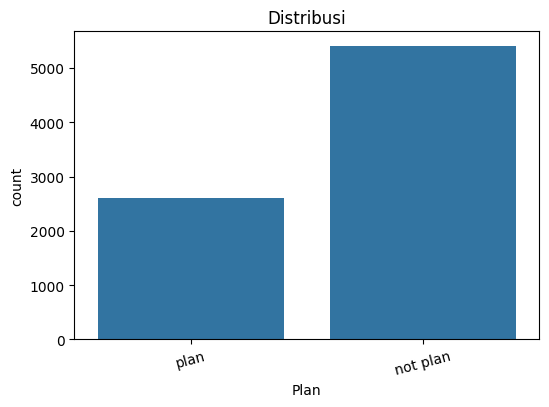

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Plan', data=df)
plt.title('Distribusi')
plt.xticks(rotation=15)
plt.show()

##Visualisasi heatmap korelasi

In [16]:
# mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)  # urutan kelas
df['stunting'] = stunting_cat.cat.codes               # y numerik

# fitur kategorikal lain (jenis_kelamin, wasting) -> kode juga
for col in ['jenis_kelamin', 'wasting']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()

KeyError: 'stunting'

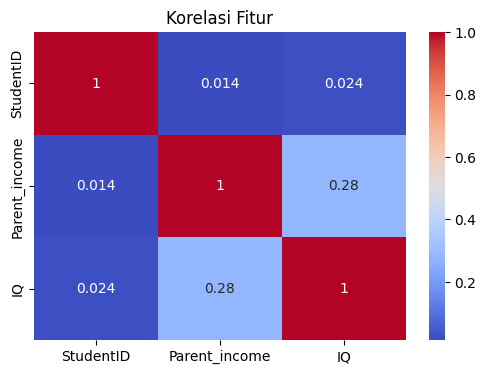

In [15]:
# korelasi

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()